In [1]:
# Task1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:

df = pd.read_csv(r'DS1_C9_S6_Practice_Vehicle_Data.csv')
df

,Manufacturer,Model,Vehicle_type,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,Passenger,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,02-02-2012,58.280150
1,Acura,TL,Passenger,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,06-03-2011,91.370778
2,Acura,CL,Passenger,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,01-04-2012,NaN
3,Acura,RL,Passenger,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,03-10-2011,91.389779
4,Audi,A4,Passenger,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10-08-2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,Passenger,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,Passenger,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,Passenger,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,Passenger,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [3]:
df.isnull().sum()

Manufacturer         0
Model                0
Vehicle_type         0
Engine_size          1
Horsepower           1
Wheelbase            1
Width                1
Length               1
Curb_weight          2
Fuel_capacity        1
Fuel_efficiency      3
Latest_Launch        0
Power_perf_factor    2
dtype: int64

In [4]:
df.dtypes

Manufacturer          object
Model                 object
Vehicle_type          object
Engine_size          float64
Horsepower           float64
Wheelbase            float64
Width                float64
Length               float64
Curb_weight          float64
Fuel_capacity        float64
Fuel_efficiency      float64
Latest_Launch         object
Power_perf_factor    float64
dtype: object

In [5]:
float_dtype = df.select_dtypes(include = 'number')
category = df.select_dtypes(exclude = 'number')

In [6]:
df.value_counts

<bound method DataFrame.value_counts of     Manufacturer    Model Vehicle_type  Engine_size  Horsepower  Wheelbase  \
0          Acura  Integra    Passenger          1.8       140.0      101.2   
1          Acura       TL    Passenger          3.2       225.0      108.1   
2          Acura       CL    Passenger          3.2       225.0      106.9   
3          Acura       RL    Passenger          3.5       210.0      114.6   
4           Audi       A4    Passenger          1.8       150.0      102.6   
..           ...      ...          ...          ...         ...        ...   
152        Volvo      V40    Passenger          1.9       160.0      100.5   
153        Volvo      S70    Passenger          2.4       168.0      104.9   
154        Volvo      V70    Passenger          2.4       168.0      104.9   
155        Volvo      C70    Passenger          2.3       236.0      104.9   
156        Volvo      S80    Passenger          2.9       201.0      109.9   

     Width  Length  Cur

In [7]:
# Converting object datatype into category
df["Manufacturer"] = df["Manufacturer"].astype("category")
df["Model"] = df["Model"].astype("category")
df["Vehicle_type"] = df["Vehicle_type"].astype("category")
df["Latest_Launch"] = df["Latest_Launch"].astype("category")



In [8]:
# Missing value treatment for category
# Add "Not Available" to categorical columns first (if not already present)
for col in ["Manufacturer", "Model", "Vehicle_type", "Latest_Launch"]:
    if df[col].dtype.name == 'category':
        df[col] = df[col].cat.add_categories("Not Available")
    df[col] = df[col].fillna("Not Available")


In [9]:
for col in float_dtype.columns:
    df[col] = df[col].fillna(df[col].mode()[0])

In [10]:
df.isnull().sum()

Manufacturer         0
Model                0
Vehicle_type         0
Engine_size          0
Horsepower           0
Wheelbase            0
Width                0
Length               0
Curb_weight          0
Fuel_capacity        0
Fuel_efficiency      0
Latest_Launch        0
Power_perf_factor    0
dtype: int64

In [11]:
no_outlier = df.copy()

def outlier_cleanup(col):
    # Calculate IQR and outlier fences
    q1 = no_outlier[col].quantile(0.25)
    q3 = no_outlier[col].quantile(0.75)
    iqr = q3 - q1
    lf = q1 - (1.5 * iqr)  # lower fence
    uf = q3 + (1.5 * iqr)  # upper fence

    # Check column type for proper handling of integer and float types
    col_type = str(no_outlier[col].dtype)

    # Apply outlier treatment
    if col_type in ["int64"]:
        # For integer columns, round the fence values and cast them to integers
        no_outlier.loc[no_outlier[col] < lf, col] = int(round(lf))
        no_outlier.loc[no_outlier[col] > uf, col] = int(round(uf))
    else:
        # For float columns, directly assign the fence values
        no_outlier.loc[no_outlier[col] < lf, col] = lf
        no_outlier.loc[no_outlier[col] > uf, col] = uf

In [12]:
for col in float_dtype.columns:
    outlier_cleanup(col)

In [13]:
def myscaling():
    mydatatype = ["float64"] # creating new table of this datatype
    new_loan_df = df.select_dtypes(include = mydatatype) # creating numpyarray for standardscalers
    scaler = StandardScaler() # creating an object for StandardScaler
    df_scaled = pd.DataFrame(scaler.fit_transform(new_loan_df.to_numpy()), columns = new_loan_df.columns) # scaling, conevrting back into table, if we use reshape then we are concerting column by column
    # Dataframe id converted into numpy
    # Numpy is scaled 
    # Scaled data is converted back to dataframe
    return df_scaled

In [14]:
df_scaled = myscaling()
df_scaled

,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,-1.204279,-0.810482,-0.831021,-1.108357,-1.119192,-1.164119,-1.230913,0.977073,-0.736109
1,0.140061,0.696328,0.076667,-0.238297,0.416828,0.233586,-0.195535,0.267980,0.584447
2,0.140061,0.696328,-0.081192,-0.151291,0.349393,0.158766,-0.195535,0.504344,-0.983344
3,0.428134,0.430420,0.931736,0.080725,0.694060,0.763695,0.011541,-0.441113,0.585205
4,-1.204279,-0.633210,-0.646853,-0.847339,-0.699596,-0.592620,-0.402610,0.740709,-0.556627
...,...,...,...,...,...,...,...,...,...
152,-1.108255,-0.455939,-0.923106,-1.021351,-0.804495,-0.522575,-0.557917,0.267980,-0.408125
153,-0.628133,-0.314121,-0.344290,-0.528317,-0.107667,-0.258317,-0.014344,0.267980,-0.242283
154,-0.628133,-0.314121,-0.344290,-0.528317,-0.085189,-0.177129,-0.014344,0.267980,-0.222270
155,-0.724158,0.891327,-0.344290,0.109727,-0.122652,0.367307,0.140963,-0.204749,0.993599


In [15]:
category = category.drop("Latest_Launch",axis = 1)

In [16]:
from sklearn import preprocessing
label_obj = preprocessing.LabelEncoder()
for col in category:
    category[col] = label_obj.fit_transform(category[col])

In [17]:
final_df = pd.concat([float_dtype,category],axis = 1) # axis = 1 joining by column, 0 by row
final_df = final_df.iloc[:, :]
final_df

,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Manufacturer,Model,Vehicle_type
0,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150,0,79,1
1,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778,0,143,1
2,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,NaN,0,25,1
3,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779,0,115,1
4,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
152,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,66.498812,29,148,1
153,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,70.654495,29,125,1
154,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,71.155978,29,149,1
155,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,101.623357,29,24,1


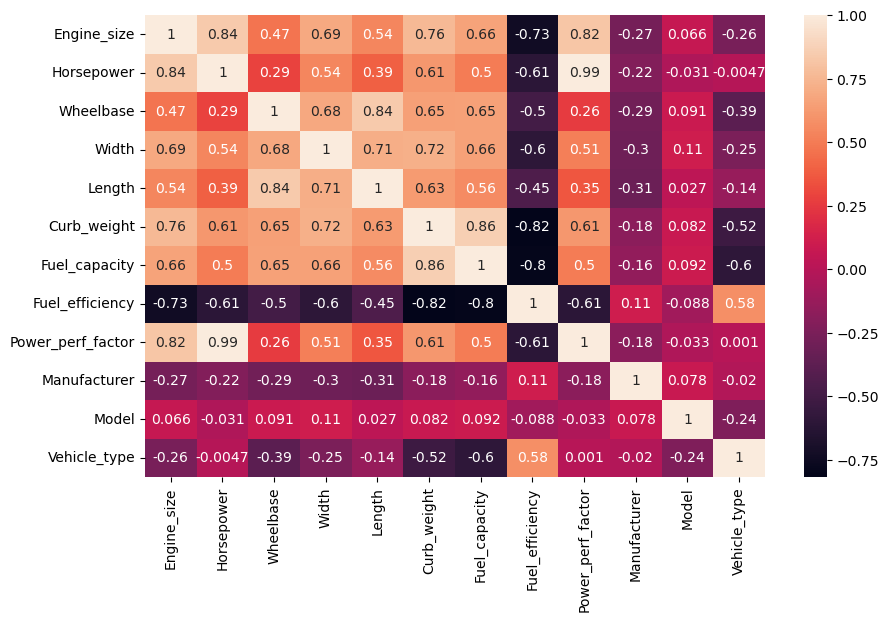

In [18]:
import seaborn as sns
fig,ax =  plt.subplots(figsize=(10,6))
sns.heatmap(final_df.corr(),annot = True)
plt.show()

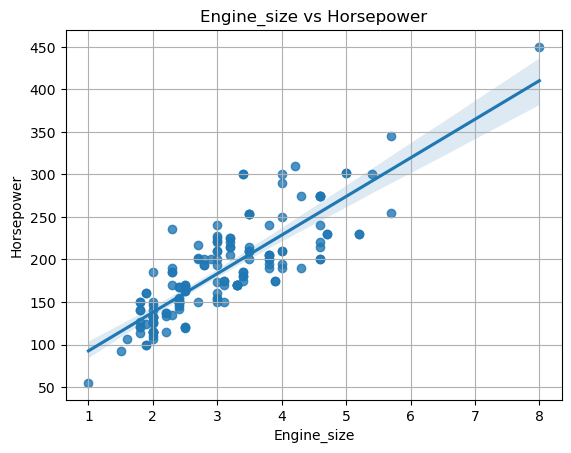

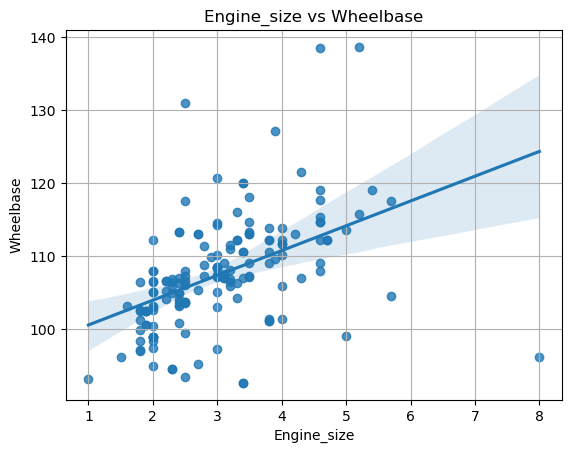

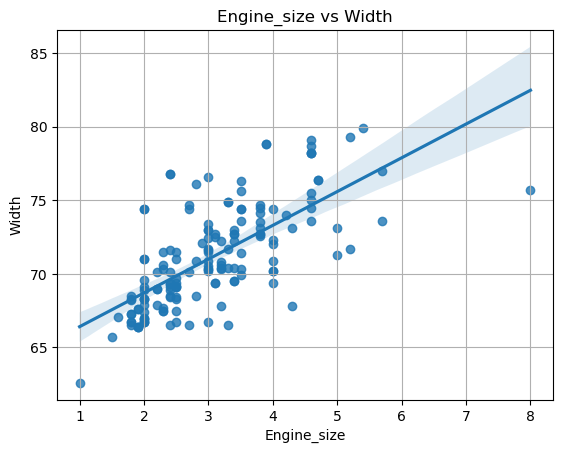

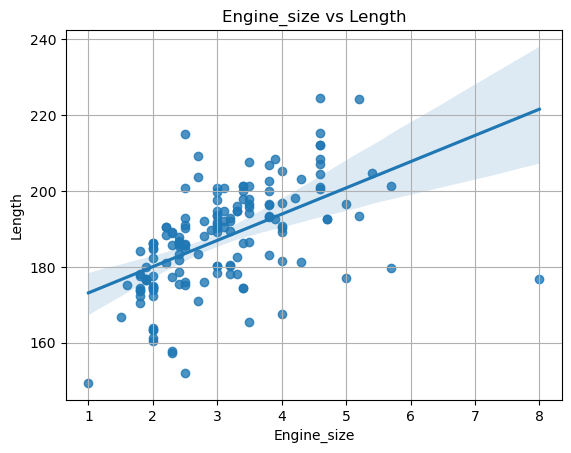

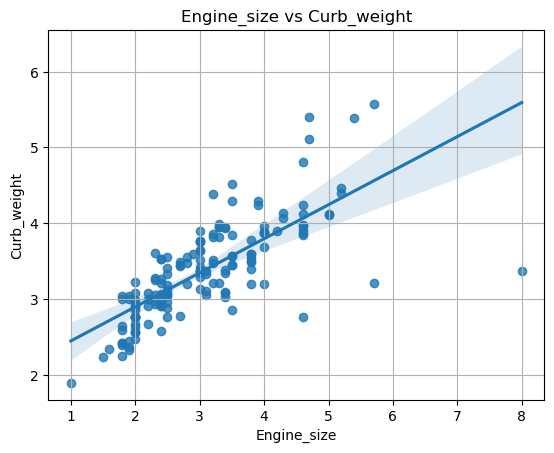

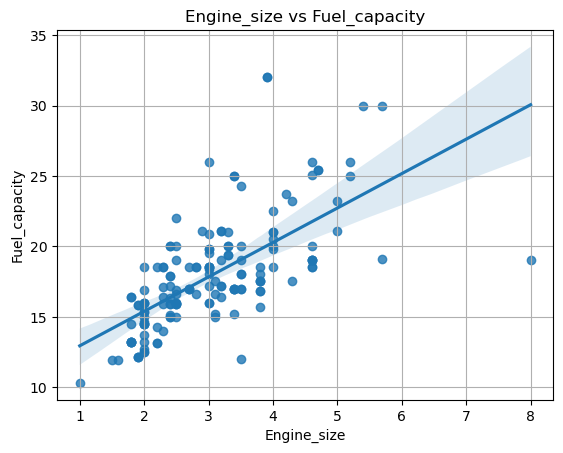

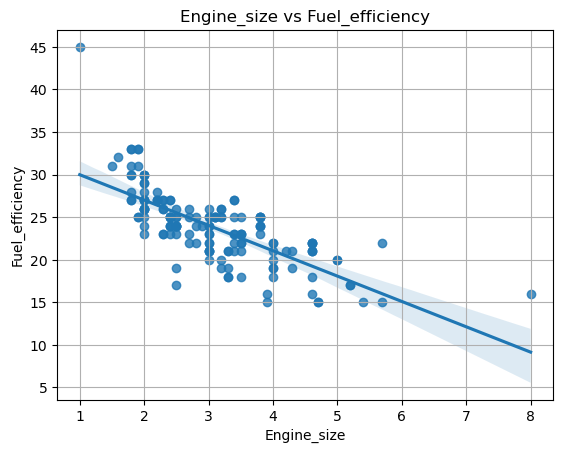

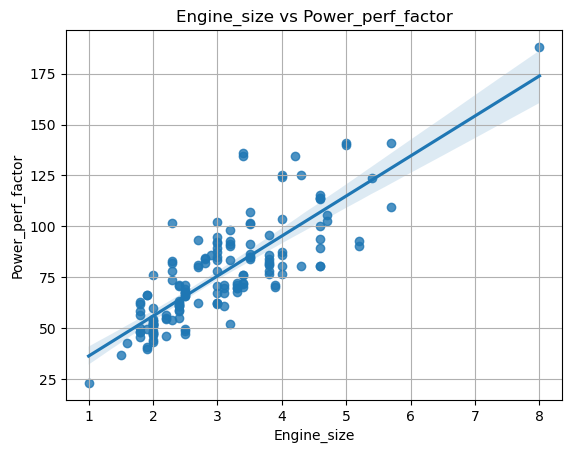

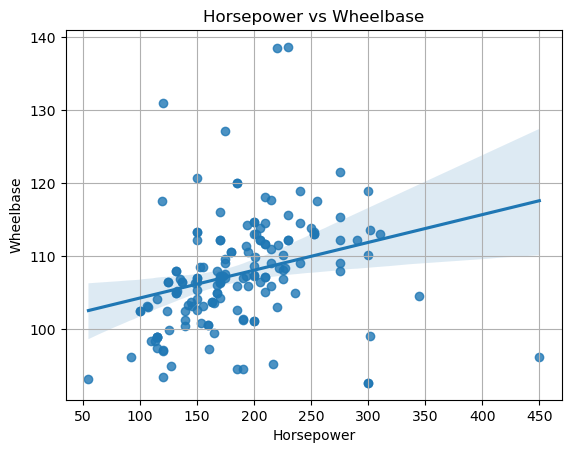

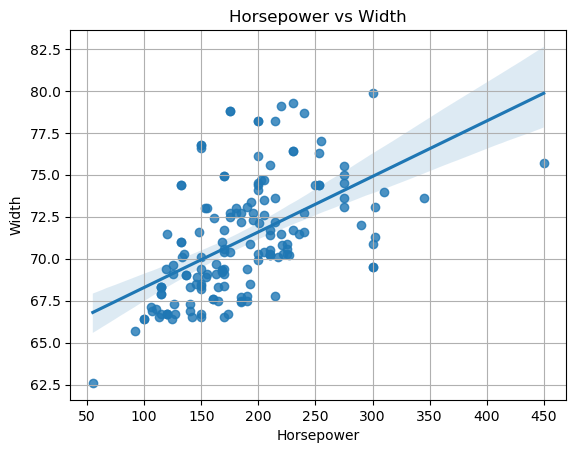

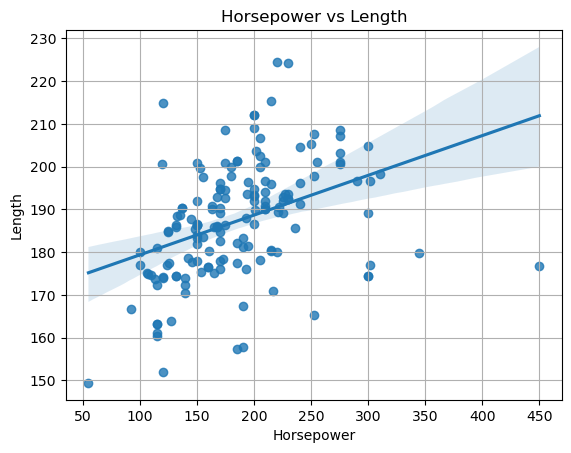

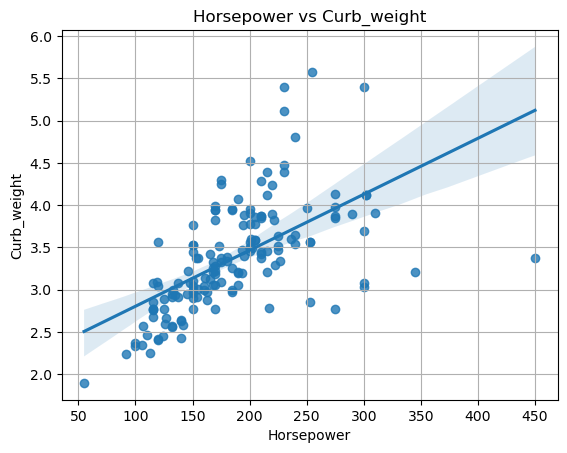

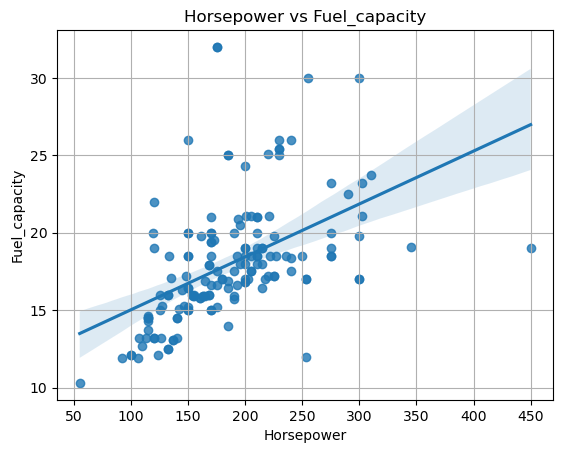

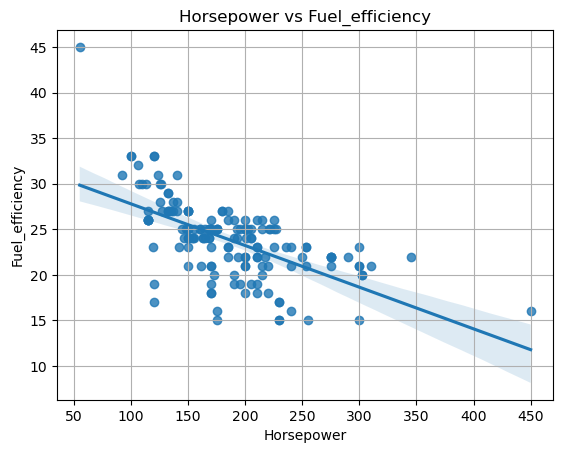

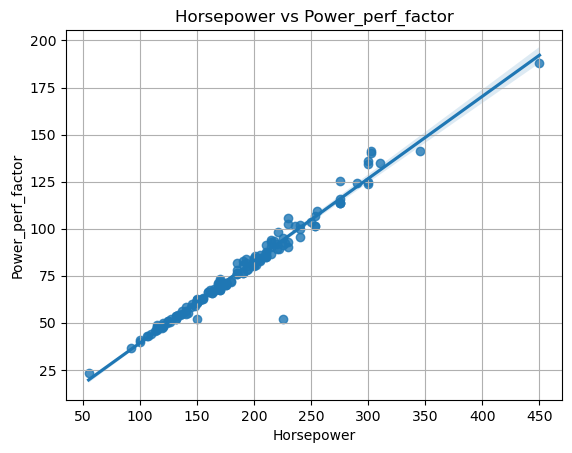

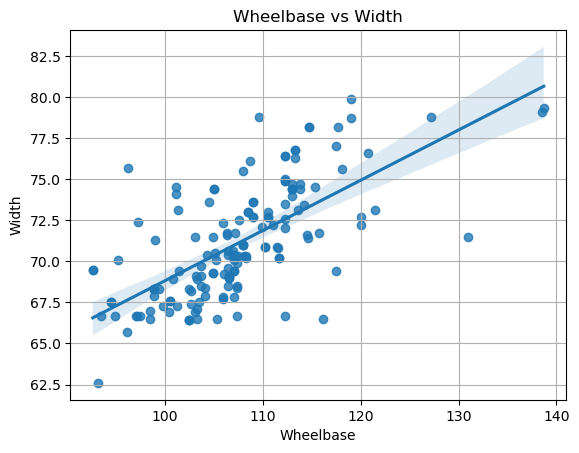

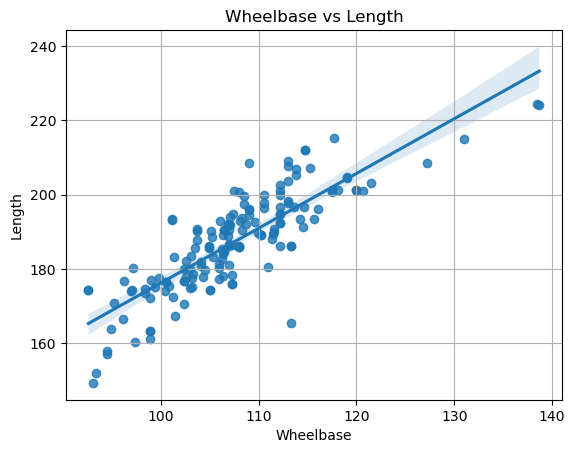

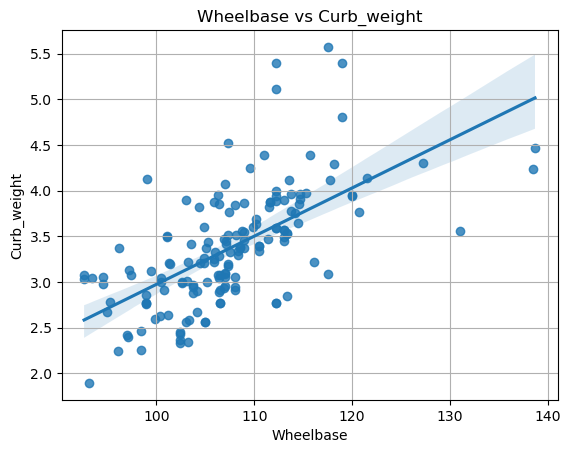

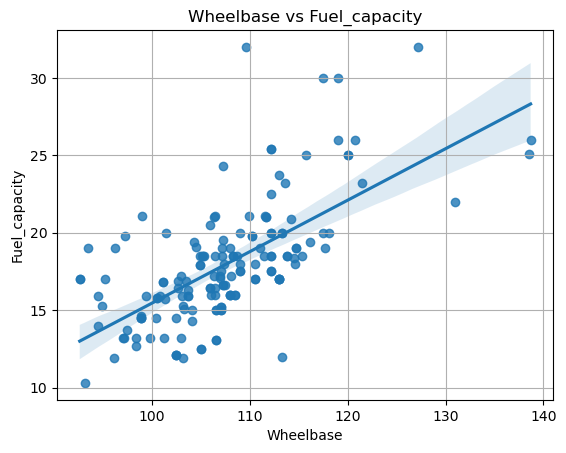

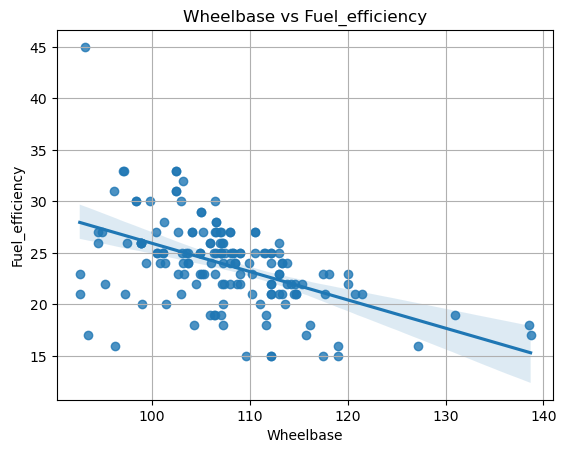

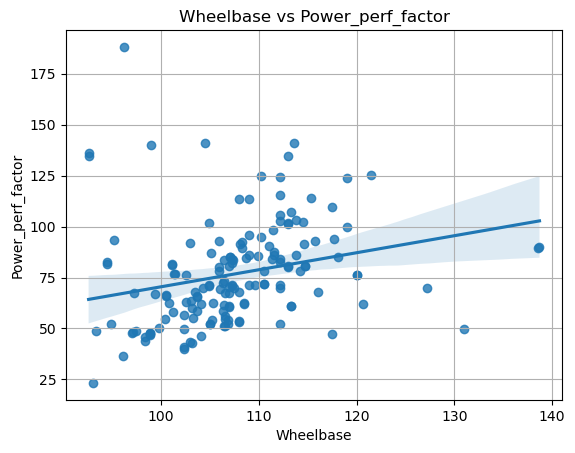

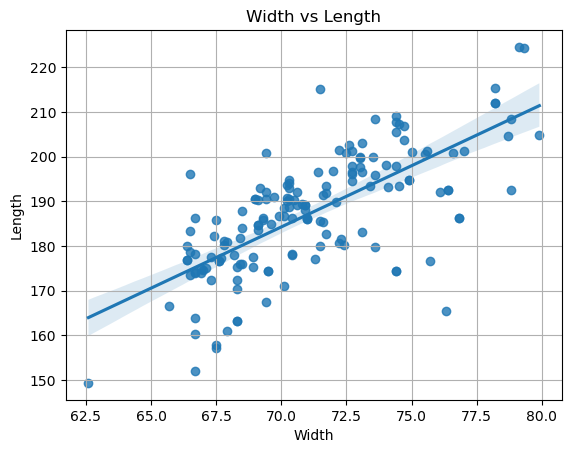

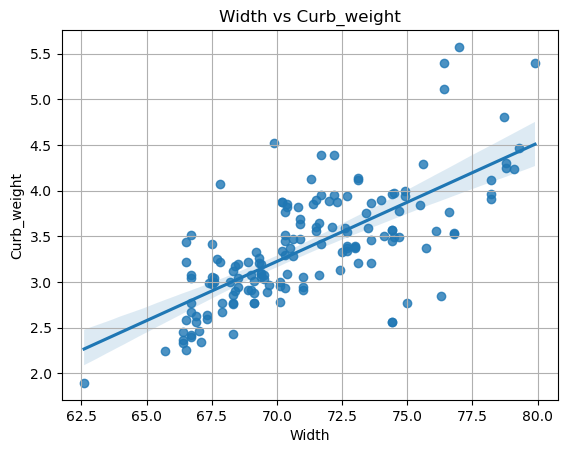

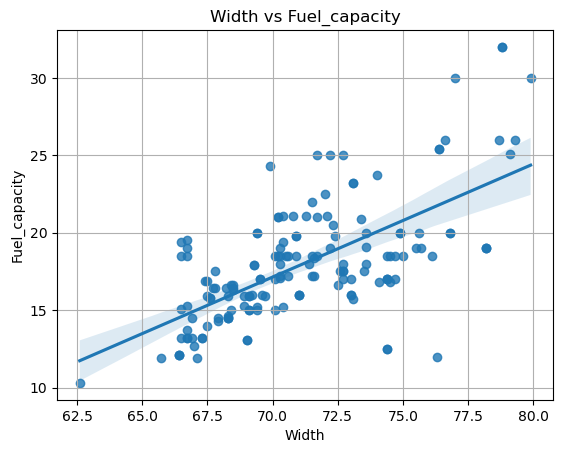

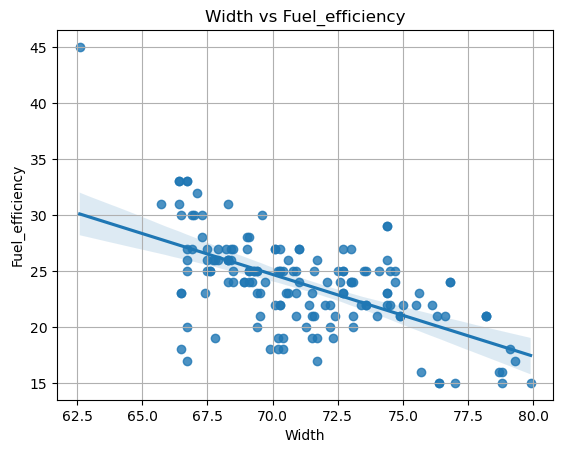

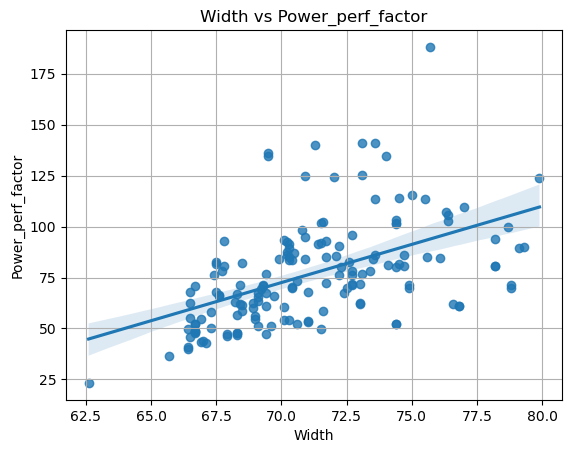

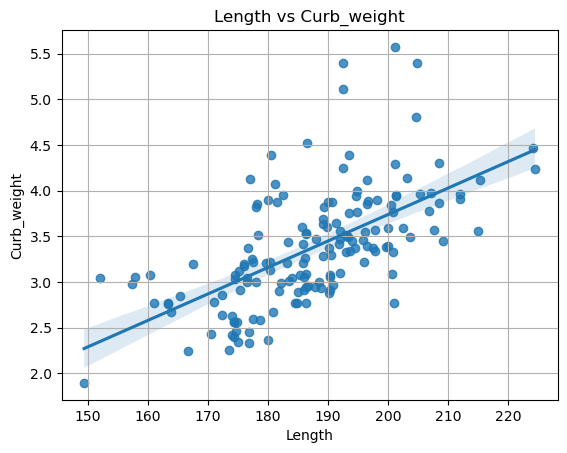

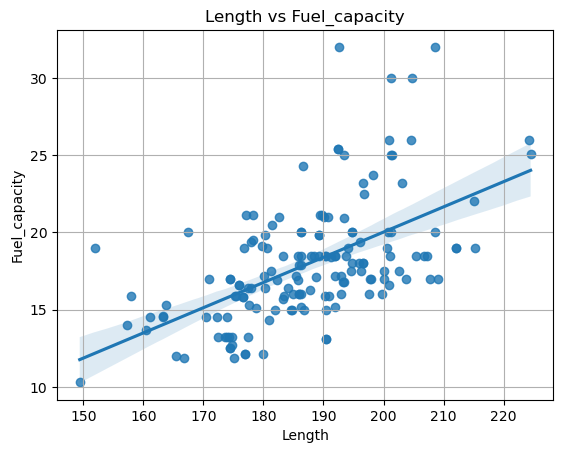

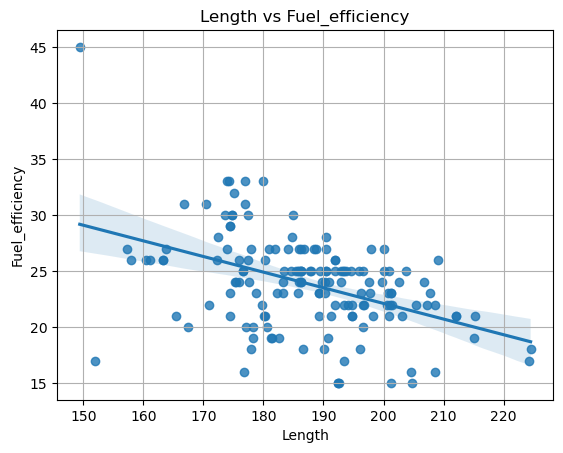

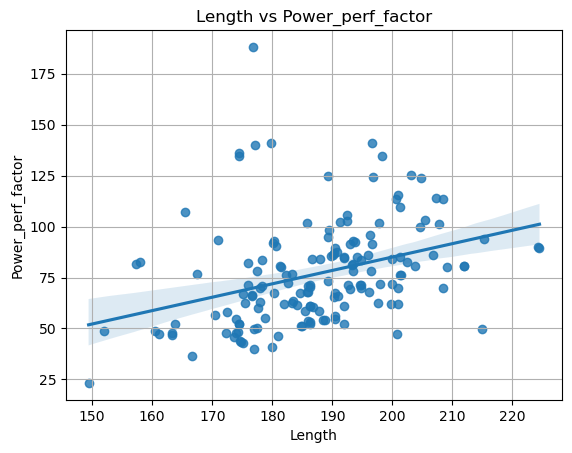

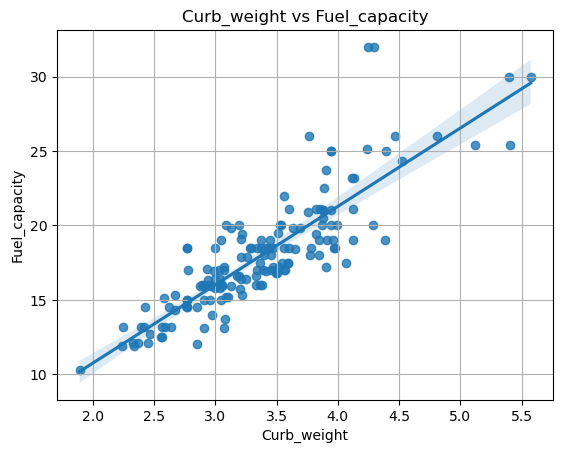

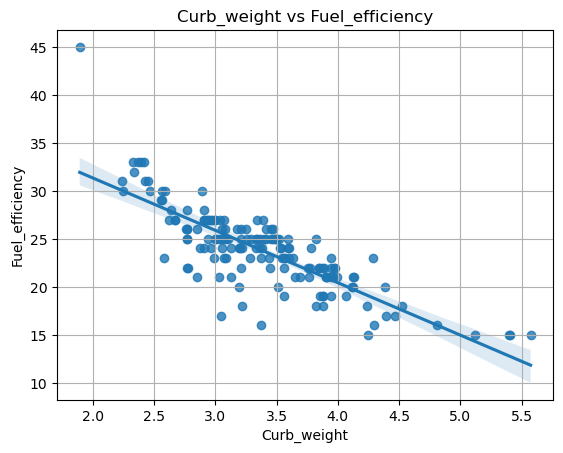

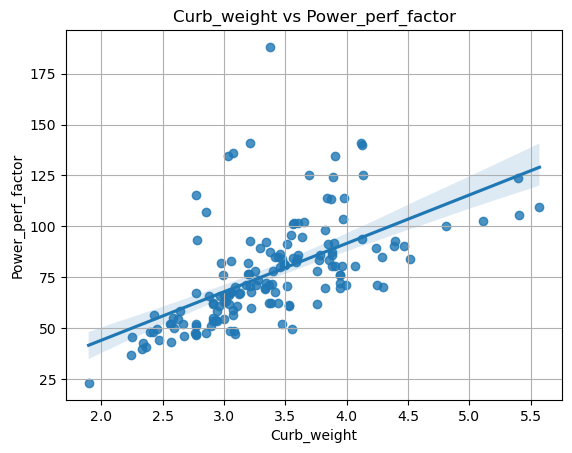

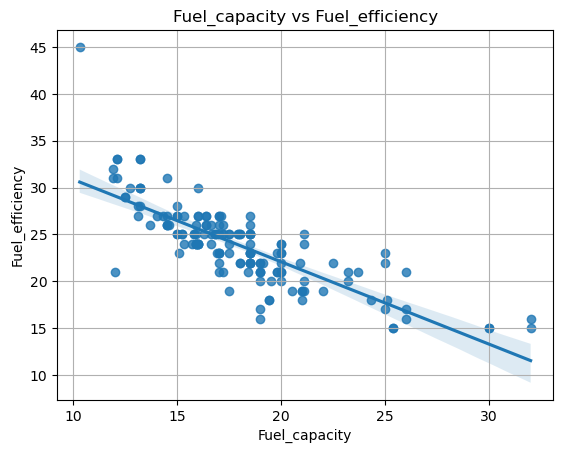

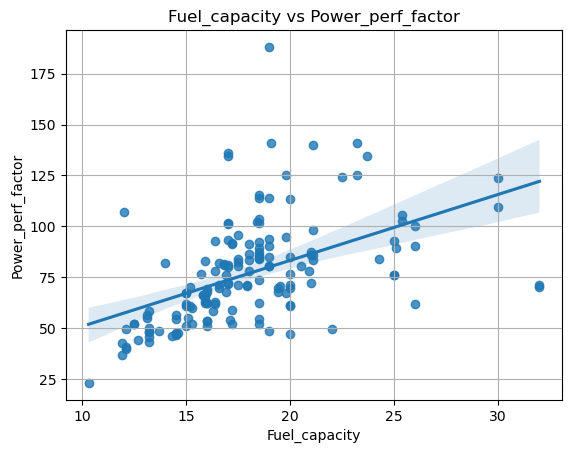

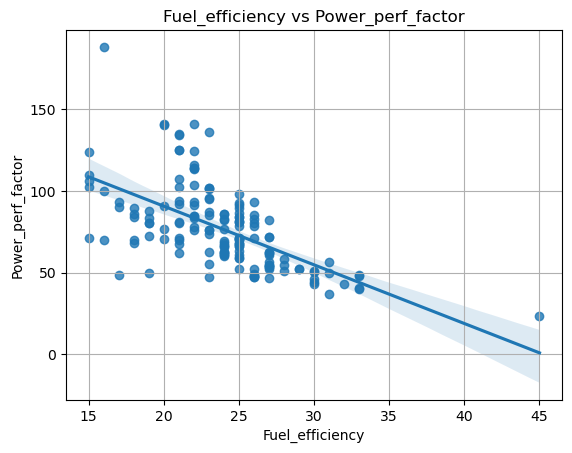

In [19]:
from itertools import combinations

# Loop through all pairs of numeric columns
for x, y in combinations(float_dtype, 2):
    sns.regplot(x=x, y=y, data=df)
    plt.title(f"{x} vs {y}")
    plt.grid(True)
    plt.show()

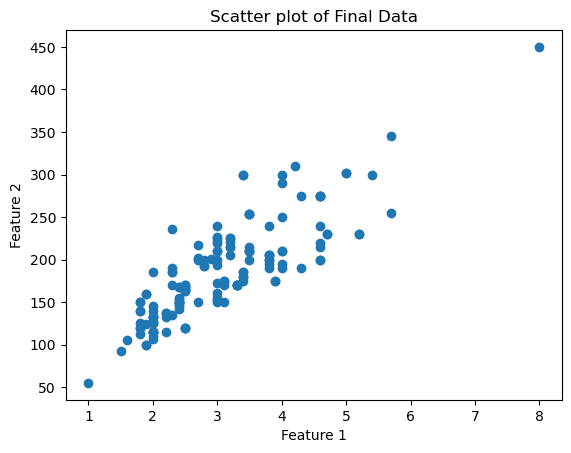

In [20]:
plt.scatter(final_df.iloc[:, 0], final_df.iloc[:, 1])
plt.xlabel("Feature 1")  # Optional: Label axes
plt.ylabel("Feature 2")
plt.title("Scatter plot of Final Data")
plt.show()

In [21]:
print(float_dtype.isna().sum())

Engine_size          1
Horsepower           1
Wheelbase            1
Width                1
Length               1
Curb_weight          2
Fuel_capacity        1
Fuel_efficiency      3
Power_perf_factor    2
dtype: int64


In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def my_vif(x):
    vif_scores = pd.Series(dtype='float64', name="VIF")
    for i in range(x.shape[1]):
        vif_scores[x.columns[i]] = variance_inflation_factor(x.values, i)
    return vif_scores

# Clean your float_dtype data
# 1. Drop rows with NaN or inf
float_dtype_clean = float_dtype.replace([np.inf, -np.inf], np.nan).dropna()

# 2. Compute VIF
vif_values = my_vif(float_dtype_clean)

# 3. Sort VIF scores
vif_values.sort_values(ascending=False)


Horsepower           1251.803027
Power_perf_factor    1012.393928
Wheelbase             870.325373
Length                859.232563
Width                 701.882824
Curb_weight           205.760468
Fuel_capacity         109.011996
Fuel_efficiency       102.985496
Engine_size            55.012735
Name: VIF, dtype: float64

In [23]:
x = float_dtype_clean[["Horsepower","Engine_size"]]

In [24]:
err = []
mycluster = np.arange(2,11)
for k in mycluster:
  temp = KMeans(n_clusters = k)
  temp.fit(x)
  err.append(temp.inertia_)

C:\Users\akshi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\akshi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\akshi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\akshi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

In [25]:
err

[196178.59777064386,
 97650.15864035087,
 63843.045528840965,
 39145.61001685048,
 29185.050318262543,
 18657.846895480645,
 14751.587871896623,
 12293.476926516718,
 9397.530530936456]

Text(0, 0.5, 'value received from .inertia_')

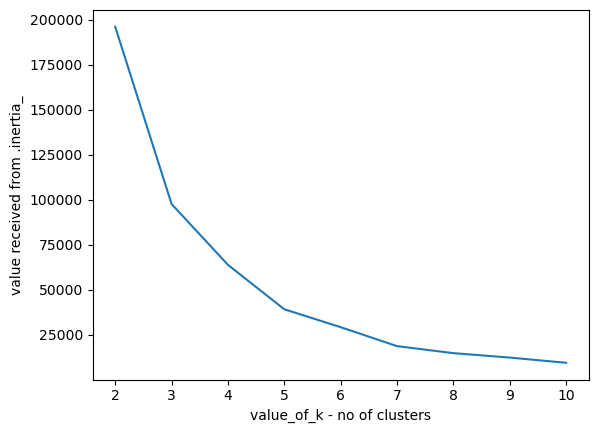

In [26]:
# Task2
plt.plot(mycluster,err)
plt.xlabel("value_of_k - no of clusters")
plt.ylabel("value received from .inertia_")

In [27]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

In [31]:
for j in mycluster:
  temp_model = KMeans(n_clusters=j,random_state=0)
  cluster_labels = temp_model.fit_predict(x)
  silhouette_avg = silhouette_score(x,cluster_labels)*100
  print("for clusters  = ",j,"silhouette is", silhouette_avg)
  print("for clusters  = ",j,"davies_bouldin_score is", davies_bouldin_score(x,temp_model.labels_))
  print("for clusters  = ",j,"calinski_harabasz_score is", calinski_harabasz_score(x,temp_model.labels_))
  print()


for clusters  =  2 silhouette is 55.05870610890682
for clusters  =  2 davies_bouldin_score is 0.639881782836297
for clusters  =  2 calinski_harabasz_score is 222.8099980444166

for clusters  =  3 silhouette is 55.62634555425415
for clusters  =  3 davies_bouldin_score is 0.5273864987746745
for clusters  =  3 calinski_harabasz_score is 297.59953460768105

for clusters  =  4 silhouette is 55.9865260572391
for clusters  =  4 davies_bouldin_score is 0.49331636962774594
for clusters  =  4 calinski_harabasz_score is 342.0839538325442

for clusters  =  5 silhouette is 56.71461013193685
for clusters  =  5 davies_bouldin_score is 0.4133579499494499
for clusters  =  5 calinski_harabasz_score is 431.9707588971904

for clusters  =  6 silhouette is 56.60271772277225
for clusters  =  6 davies_bouldin_score is 0.42609378285331734
for clusters  =  6 calinski_harabasz_score is 533.1965949478976

for clusters  =  7 silhouette is 56.66925391068073
for clusters  =  7 davies_bouldin_score is 0.4434902286129

C:\Users\akshi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\akshi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\akshi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\akshi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

C:\Users\akshi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\akshi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\akshi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\akshi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

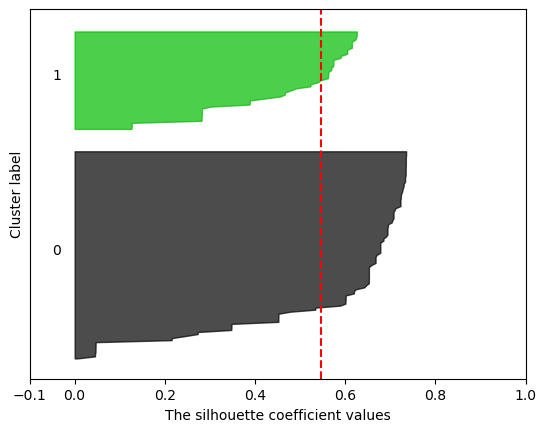

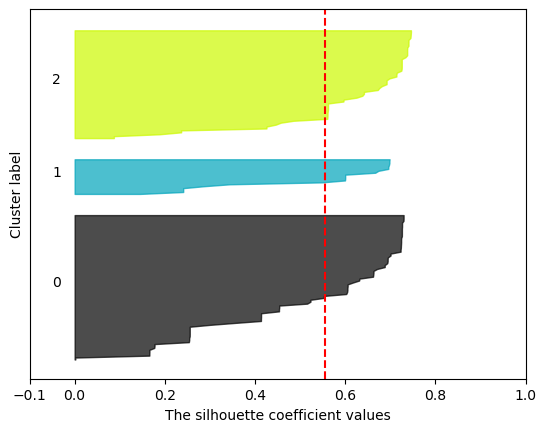

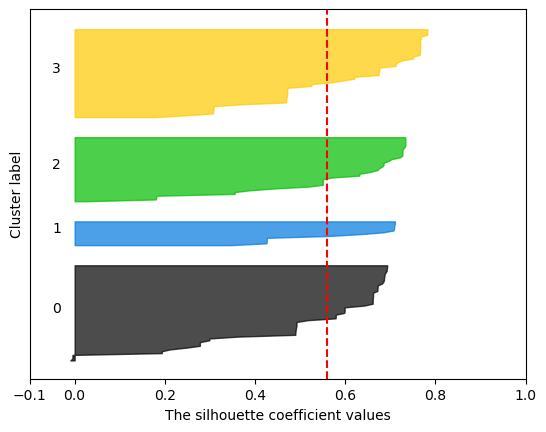

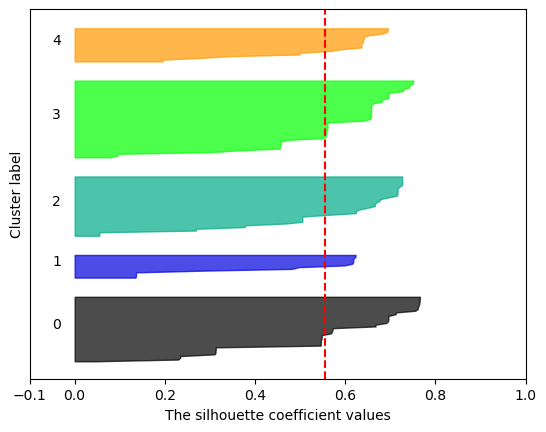

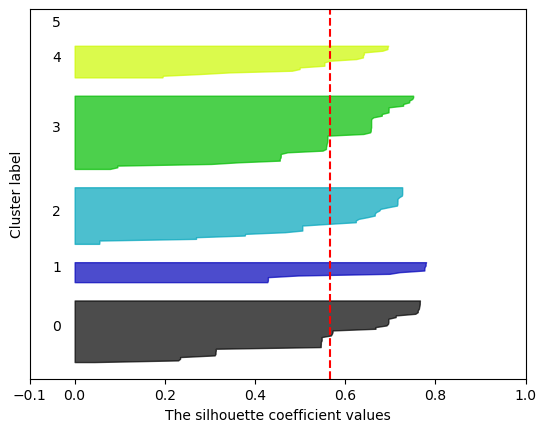

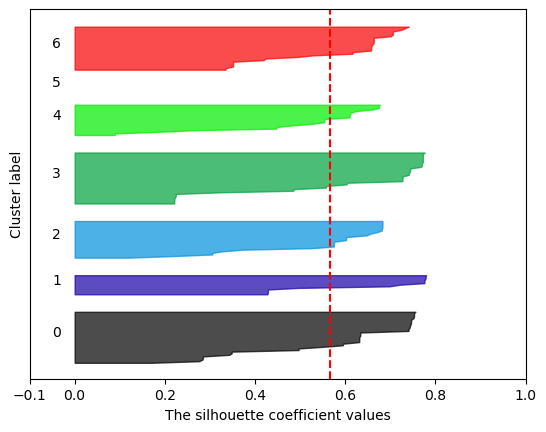

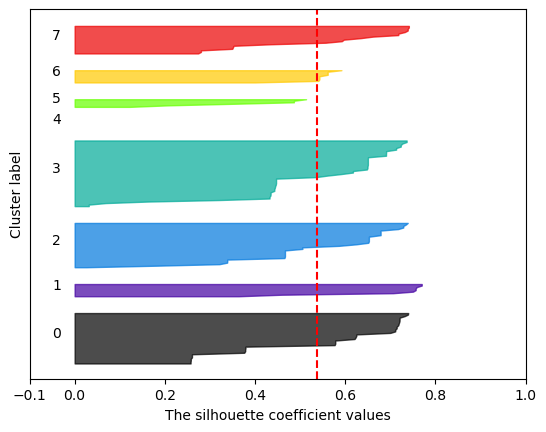

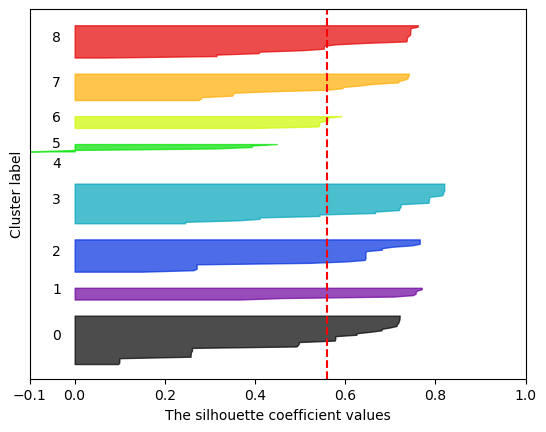

In [33]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
range_n_clusters = range(2,10)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical line for average silhouette score of all the values
    sil_avg = silhouette_score(x,cluster_labels)
    ax1.axvline(x=sil_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    # axline line is used for treshold
    # axvline kine is used as vertical treshold
plt.show()

In [35]:
final_km = KMeans(n_clusters=3,random_state=0)
final_km.fit(x)
final_centroid = final_km.cluster_centers_
final_labels = final_km.labels_ # Final model

C:\Users\akshi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [37]:
j = 3 # No of clusers required are 5
print("for clusters  = ",j,"silhouette is",round(silhouette_score(x,final_km.labels_),2) )
print("for clusters  = ",j,"davies_bouldin_score is", davies_bouldin_score(x,final_km.labels_))
print("for clusters  = ",j,"calinski_harabasz_score is", calinski_harabasz_score(x,final_km.labels_))
print() # to finalize, we need to check all performances with a priority given to visuals

for clusters  =  3 silhouette is 0.56
for clusters  =  3 davies_bouldin_score is 0.5273864987746745
for clusters  =  3 calinski_harabasz_score is 297.59953460768105



C:\Users\akshi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


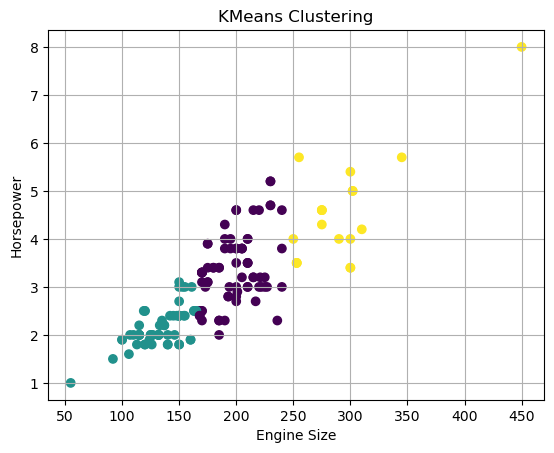

In [39]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(x)

plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel("Engine Size")
plt.ylabel("Horsepower")
plt.title("KMeans Clustering")
plt.grid(True)
plt.show()